In [ ]:
'''
------------------------------------------------
Análisis de modelos predictivos en bolsa
Copyright (C) 2024-2025 MegaStorm Systems

This software is provided 'as-is', without any express or implied
warranty.  In no event will the authors be held liable for any damages
arising from the use of this software.

Permission is granted to anyone to use this software for any purpose,
including commercial applications, and to alter it and redistribute it
freely, subject to the following restrictions:

1. The origin of this software must not be misrepresented; you must not
claim that you wrote the original software. If you use this software
in a product, an acknowledgment in the product documentation would be
appreciated but is not required.
2. Altered source versions must be plainly marked as such, and must not be
misrepresented as being the original software.
3. This notice may not be removed or altered from any source distribution.

------------------------------------------------------------------------------------------------
Predictor aleatorio v1.2
  - Utiliza la frecuencia historica de dias en los que el precio sube o baja
  - Utiliza los ultimos n dias
  - Graficos
------------------------------------------------------------------------------------------------'''

"\n------------------------------------------------\nAnálisis de modelos predictivos en bolsa: NVIDIA\nMSRPP\nCopyright (C) 2024-2025 MegaStorm Systems\n\nThis software is provided 'as-is', without any express or implied\nwarranty.  In no event will the authors be held liable for any damages\narising from the use of this software.\n\nPermission is granted to anyone to use this software for any purpose,\nincluding commercial applications, and to alter it and redistribute it\nfreely, subject to the following restrictions:\n\n1. The origin of this software must not be misrepresented; you must not\nclaim that you wrote the original software. If you use this software\nin a product, an acknowledgment in the product documentation would be\nappreciated but is not required.\n2. Altered source versions must be plainly marked as such, and must not be\nmisrepresented as being the original software.\n3. This notice may not be removed or altered from any source distribution.\n\n---------------------

In [ ]:
# Importar librerías
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ampblib import printMetricsClassification

E0000 00:00:1749062406.756629   14137 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749062406.779073   14137 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749062406.957193   14137 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749062406.957253   14137 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749062406.957254   14137 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749062406.957255   14137 computation_placer.cc:177] computation placer already registered. Please check linka

In [3]:
# Cargar datos
nombre_archivo = "NVDA_2015-01-05_2025-05-23_SA.csv"
datos = pd.read_csv(nombre_archivo)

In [13]:
# Dividir en conjunto de entrenamiento y prueba (dias)
test_size = 60
train_data = datos.iloc[:-test_size]
test_data = datos.iloc[-test_size:]

y_test = test_data['Trend'].values # Obtener valores reales de test
np.random.seed(2578)  # Fijar la semilla para reproducibilidad

In [14]:
# Enfoque 1: Usar todo el histórico para el predictor aleatorio
print("\nEnfoque 1: Predictor basado en todo el histórico")
proporcion_sube_completo = train_data['Trend'].mean() 
print(f" - Proporción de días que sube o se mantiene el precio: {proporcion_sube_completo:.3f}") 
print(f" - Proporción de días que baja el precio: {1-proporcion_sube_completo:.3f}\n") 

# Crear predicciones aleatorias basadas en todo el histórico
predicciones_aleatorias_completo = np.random.choice(
    [0, 1], 
    size=len(test_data), 
    p=[1-proporcion_sube_completo, proporcion_sube_completo]
)

# Imprimir resultados del enfoque 1
printMetricsClassification(y_test, predicciones_aleatorias_completo, "Predictor aleatorio (histórico completo)")


Enfoque 1: Predictor basado en todo el histórico
 - Proporción de días que sube o se mantiene el precio: 0.548
 - Proporción de días que baja el precio: 0.452

INFO: Interpretando 'y_pred_input' como clases binarias. Umbral fijado a 0.5.


Métricas de clasificaciión - Predictor aleatorio (histórico completo):
 Accuracy (Exactitud): 0.4333
 Precision (Precision): 0.4483
 Recall (Sensibilidad): 0.4194
 F1-Score: 0.4333
 ROC-AUC: 0.4338


In [15]:
# Enfoque 2: Usar solo los últimos n días del conjunto de entrenamiento
print(f"\nEnfoque 2: Predictor basado en los últimos {test_size} días")
ultimos_train = train_data.iloc[-test_size:]
proporcion_sube_reciente = ultimos_train['Trend'].mean()
print(f" - Proporción de días que sube o se mantiene el precio: {proporcion_sube_reciente:.3f}") 
print(f" - Proporción de días que baja el precio: {1-proporcion_sube_reciente:.3f}\n")

# Crear predicciones aleatorias basadas en los últimos n días
predicciones_aleatorias_reciente = np.random.choice(
    [0, 1], 
    size=len(test_data), 
    p=[1-proporcion_sube_reciente, proporcion_sube_reciente]
)

# Imprimir resultados del enfoque 2
printMetricsClassification(y_test, predicciones_aleatorias_reciente, f"Predictor aleatorio (últimos {test_size} días)")


Enfoque 2: Predictor basado en los últimos 60 días
 - Proporción de días que sube o se mantiene el precio: 0.500
 - Proporción de días que baja el precio: 0.500

INFO: Interpretando 'y_pred_input' como clases binarias. Umbral fijado a 0.5.


Métricas de clasificaciión - Predictor aleatorio (últimos 60 días):
 Accuracy (Exactitud): 0.5167
 Precision (Precision): 0.5294
 Recall (Sensibilidad): 0.5806
 F1-Score: 0.5538
 ROC-AUC: 0.5145


In [16]:
# Enfoque 3: Predictor aleatorio puro (sin usar el histórico)
print("\nEnfoque 3: Predictor aleatorio puro (sin información histórica)")
predicciones_aleatorias_puro = np.random.choice(
    [0, 1], 
    size=len(test_data), 
    p=[0.5, 0.5]  # Probabilidades iguales para subida o bajada
)

# Imprimir resultados
printMetricsClassification(y_test, predicciones_aleatorias_puro, "Predictor aleatorio puro")


Enfoque 3: Predictor aleatorio puro (sin información histórica)
INFO: Interpretando 'y_pred_input' como clases binarias. Umbral fijado a 0.5.


Métricas de clasificaciión - Predictor aleatorio puro:
 Accuracy (Exactitud): 0.4333
 Precision (Precision): 0.4444
 Recall (Sensibilidad): 0.3871
 F1-Score: 0.4138
 ROC-AUC: 0.4349


<Figure size 1300x600 with 0 Axes>

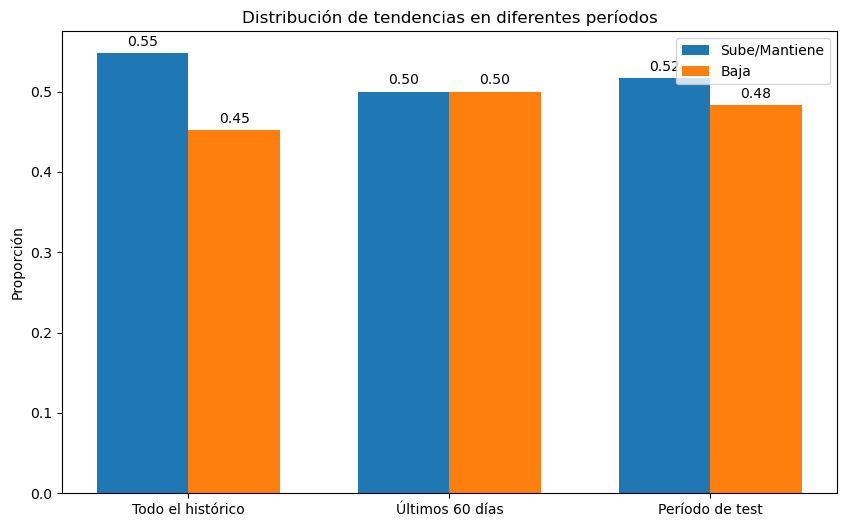

Proporción de subidas en diferentes períodos:
- Todo el histórico: 0.548
- Últimos 60 días: 0.500
- Período de test: 0.517


In [7]:
# Visualizar la distribución de tendencias en diferentes períodos
plt.figure(figsize=(13, 6))

# Gráfico de barras para comparar proporciones
labels = ['Todo el histórico', f'Últimos {test_size} días', 'Período de test']
sube = [proporcion_sube_completo, proporcion_sube_reciente, y_test.mean()]
baja = [1-proporcion_sube_completo, 1-proporcion_sube_reciente, 1-y_test.mean()]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, sube, width, label='Sube/Mantiene')
rects2 = ax.bar(x + width/2, baja, width, label='Baja')

ax.set_ylabel('Proporción')
ax.set_title('Distribución de tendencias en diferentes períodos')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Añadir etiquetas de valores en las barras
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 puntos de desplazamiento vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

print("Proporción de subidas en diferentes períodos:")
print(f"- Todo el histórico: {proporcion_sube_completo:.3f}")
print(f"- Últimos 60 días: {proporcion_sube_reciente:.3f}")
print(f"- Período de test: {y_test.mean():.3f}")

Enfoque 1: Usar todo el histórico
 Ventajas:
 Mayor estabilidad estadística: Al usar más datos, obtenemos una estimación más robusta de la tendencia general del activo.
 Visión a largo plazo: Captura el comportamiento promedio a lo largo de un período extenso, suavizando anomalías temporales.
 Menos sensible a volatilidad reciente: No se ve tan afectado por eventos recientes que podrían ser atípicos.

 Desventajas:
 Puede no reflejar el régimen actual del mercado: Los mercados pasan por diferentes regímenes (alcista, bajista, lateral), y datos muy antiguos podrían no ser  relevantes para la situación actual.
 Ignora tendencias recientes: Si ha habido un cambio fundamental en el comportamiento del activo, los datos antiguos podrían distorsionar las predicciones.

Enfoque 2: Usar solo los últimos 60 días
 Ventajas:
 Mayor relevancia temporal: Captura el comportamiento más reciente del activo, que podría ser más indicativo del futuro cercano.
 Adaptación a cambios de régimen: Refleja mejor los cambios recientes en la dinámica del mercado.
 Similitud con el período de prueba: Al usar un período de entrenamiento similar en tamaño al período de prueba, podría haber una mayor coherencia en las condiciones del mercado.

 Desventajas:
 Mayor variabilidad estadística: Con menos datos, las proporciones estimadas pueden ser menos estables.
 Susceptibilidad a anomalías temporales: Eventos inusuales recientes podrían distorsionar significativamente las proporciones.